In [1]:
import numpy as np

In [2]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [3]:
X_train= X_train / 255.0
X_test = X_test / 255.0

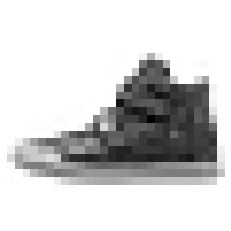

In [4]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[142], cmap="binary") 
plt.axis('off')
plt.show()

In [5]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
               "sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[142]]

'but'

In [6]:
import os
root_logdir = os.path.join(os.curdir, "image_logs") 
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [7]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])




In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


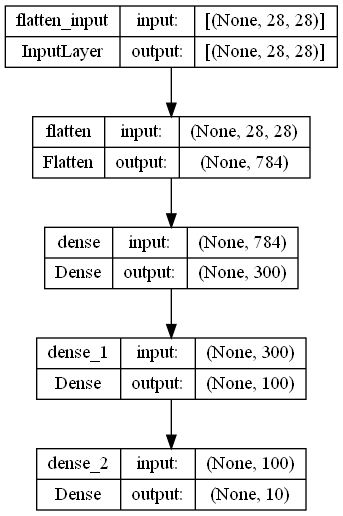

In [9]:
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

In [10]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_split=0.1, callbacks=[tensorboard_cb])

Epoch 1/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.7134 - accuracy: 0.7652 - val_loss: 0.5778 - val_accuracy: 0.7883
Epoch 2/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4878 - accuracy: 0.8307 - val_loss: 0.4670 - val_accuracy: 0.8343
Epoch 3/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4407 - accuracy: 0.8458 - val_loss: 0.4282 - val_accuracy: 0.8482
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4132 - accuracy: 0.8552 - val_loss: 0.4111 - val_accuracy: 0.8552
Epoch 5/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3931 - accuracy: 0.8619 - val_loss: 0.4031 - val_accuracy: 0.8563
Epoch 6/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8681 - val_loss: 0.4002 - val_accuracy: 0.8597
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3633 - accuracy: 0.8714 - val_loss: 0.3840 - val_accuracy:

1/1 [==============================] - 0s 117ms/step
Prediction: kozak
Confidence: 0.92006844
Truth: kozak


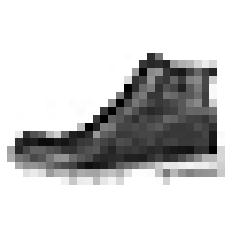

In [11]:
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
%load_ext tensorboard

In [13]:
%tensorboard --logdir ./image_logs

Reusing TensorBoard on port 6006 (pid 1988), started 1:07:31 ago. (Use '!kill 1988' to kill it.)

In [14]:
model.save('fashion_clf.h5')

In [15]:
#regression

In [16]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [17]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="softmax", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))

model.compile(loss="mean_squared_error",
              optimizer="sgd")

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [21]:
root_logdir = os.path.join(os.curdir, "housing_logs") 
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [22]:
es = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.01,verbose=1)

In [23]:
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb, es])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.5763 - val_loss: 1.2432
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 1.2457 - val_loss: 1.1978
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1949 - val_loss: 1.1388
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 1.1272 - val_loss: 1.0615
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0318 - val_loss: 0.9476
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.9027 - val_loss: 0.8045
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7749 - val_loss: 0.6902
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6844 - val_loss: 0.6187
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6285 - val_loss: 0.5741
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5919 - val_lo

In [24]:
model.save('reg_housing_1.h5')

In [25]:
%tensorboard --logdir ./housing_logs

In [26]:
# model v2

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="softmax", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(100, activation="softmax", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))

model.compile(loss="mean_squared_error",
              optimizer="sgd")

model.summary()

root_logdir = os.path.join(os.curdir, "housing_logs/housing_logs_2") 
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

es = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.01,verbose=1)

history = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb, es])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                270       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 100)               3100      
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,401
Trainable params: 4,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 1.6140 - val_loss: 1.3205
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 1.3408 -

In [28]:
model.save('reg_housing_2.h5')

In [29]:
%tensorboard --logdir ./housing_logs/housing_logs_2

In [30]:
# model v3

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="softmax", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(100, activation="tanh", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))

model.compile(loss="mean_squared_error",
              optimizer="sgd")

model.summary()

root_logdir = os.path.join(os.curdir, "housing_logs/housing_logs_3") 
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

es = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.01,verbose=1)

history = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb, es])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                270       
                                                                 
 dense_10 (Dense)            (None, 300)               9300      
                                                                 
 dense_11 (Dense)            (None, 100)               30100     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 39,771
Trainable params: 39,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 1.3116 - val_loss: 1.1235
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.9478

In [32]:
model.save('reg_housing_3.h5')

In [33]:
%tensorboard --logdir ./housing_logs/housing_log

In [34]:
# model v4

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(3000, activation="sigmoid", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1000, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))

model.compile(loss="mean_squared_error",
              optimizer="sgd")

model.summary()

root_logdir = os.path.join(os.curdir, "housing_logs/housing_logs_4") 
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

es = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.01,verbose=1)

history = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb, es])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 300)               2700      
                                                                 
 dense_14 (Dense)            (None, 3000)              903000    
                                                                 
 dense_15 (Dense)            (None, 1000)              3001000   
                                                                 
 dense_16 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 3,907,701
Trainable params: 3,907,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 2.9909 - val_loss: 1.3271
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 

In [36]:
model.save('reg_housing_4.h5')

In [37]:
%tensorboard --logdir ./housing_logs/housing_logs_4

Reusing TensorBoard on port 6006 (pid 6064), started 0:03:11 ago. (Use '!kill 6064' to kill it.)